# 实践13  递归函数
1.理解递归  
2.掌握递归函数的定义和调用
3.理解递归函数的调用过程

## 1.递归

递归是个很有趣也很有用的概念。所谓“**递归**（*recursion*，*recursive*）”，就是“用自己定义自己”，或者“自己包含自己”。举个例子，大家都听过的这个故事就是递归的经典例子：

```
从前有座山，山里有座庙，庙里有个老和尚，正在给小和尚讲故事呢！故事是这样的：从前有座山，山里有座庙，庙里有个老和尚，正在给小和尚讲故事呢！故事是这样的：从前有座山，……
```

如果我们把这个故事叫做 A，那么 A 的定义可以写作这样：

```
A ::= 从前有座山，山里有座庙，庙里有个老和尚，正在给小和尚讲故事呢！故事是这样的：A
```

上面这个定义里的 `::=` 的意思是“定义为”，这种语法叫 [巴科斯范式（BNF）](https://en.wikipedia.org/wiki/Backus%E2%80%93Naur_form)。这个定义里最有意思的地方是，在 A 的定义中用到了 A 本身，如果我们把 A 的定义代入 `::=` 右边出现的 A，就会出现无限循环下去的情况，这恰恰是原来那个故事的 point 所在。

如果把这个故事写成 Python 代码，大致是这样子的

```python
def a_monk_telling_story():
    print('从前有座山，山里有座庙，庙里有个老和尚，正在给小和尚讲故事呢！故事是这样的：')
    return a_monk_telling_story()
```

这个简短的程序体现了递归的本质：一个函数的定义中调用了自己。不过我们可不能真写这样的程序，因为它会无限的自我调用下去，形成“无限循环”，或者更难听的词儿“死循环”——循环到死。

## 2. 递归的基本概念

递归在编程中很有用，要了解这一点，我们可以来了解递归的来源：又是数学。人们很早就意识到，数学上有一类东西，很不好写出一个公式来计算，但用自己来定义自己反而会很清晰和严谨，比如大名鼎鼎的斐波那契（*Fibonacci*）数列，这个数列不仅有很高的理论价值，而且有很多数学和其他学科里的直接应用，它的定义是：

\begin{equation*}
    f(n) = \begin{cases}
               0               & n = 0\\
               1               & n = 1\\
               f(n-1) + f(n-2) & \text{otherwise}
           \end{cases}
\end{equation*}

也就是说，开头两项是 0 和 1，之后每一项都是前两项之和，这个定义来自数学家 Leonardo Fibonacci 对兔子生长问题的研究：
* 第一个月初有一对刚诞生的兔子；
* 第二个月之后（第三个月初）它们可以生育；
* 每月每对可生育的兔子会诞生下一对新兔子；
* 兔子永不死去。

在这一模型下，每个月兔子的数量就可以简单直观地用上面的递归表达式来表示。而要写出斐波那契（Fibonacci）数列的通项公式（即通过 n 的有限次运算求出第 n 项的值）就没那么容易了，当然这个公式目前不算什么了，长这样：

\begin{equation*}
    f(n) = \frac{1}{\sqrt{5}}((\frac{1+\sqrt{5}}{2})^{n} - (\frac{1-\sqrt{5}}{2})^{n})
\end{equation*}

所以可以看出，递归表达式和通项表达式很不一样，有时候递归表达式代表了问题的本质，从递归表达式出发就可以一个一个计算出值来，而通项表达式更方便快速计算出特定某一项来，却完全看不出和最初的问题有什么关联。

另一个经典的递归例子是阶乘的定义，n 的阶乘 $n!$ 就是从 1 开始一直乘到 n，递归定义很简单：

\begin{equation*}
n! = (n-1)! \times n
\end{equation*}

可要写出它的通项，怎么写呢？当然我们可以写 `n! = 1x2x3x...xn`，但是 `...` 并不是在数学上严谨的一个东西啊。

为了用 Python 计算阶乘的值，可以有两种方法，循环，和递归。先来看循环的方法：

In [ ]:
result = 1
for i in range(5):
    result = result * (i+1)
print(result)

就是把 1~n 的整数都乘起来，下面看看递归的方法：

In [ ]:
def f(n):
    if n == 1:
        return 1
    else:
        return n * f(n-1)
    
f(5)

和前面的版本结果一样。这个实现基本就是阶乘数学定义的翻译，很容易明白，但我们需要格外关注的是在函数里调用自己这件事。我们可以一层一层的分析一下在函数调用 `f(5)` 之后到底发生了什么。

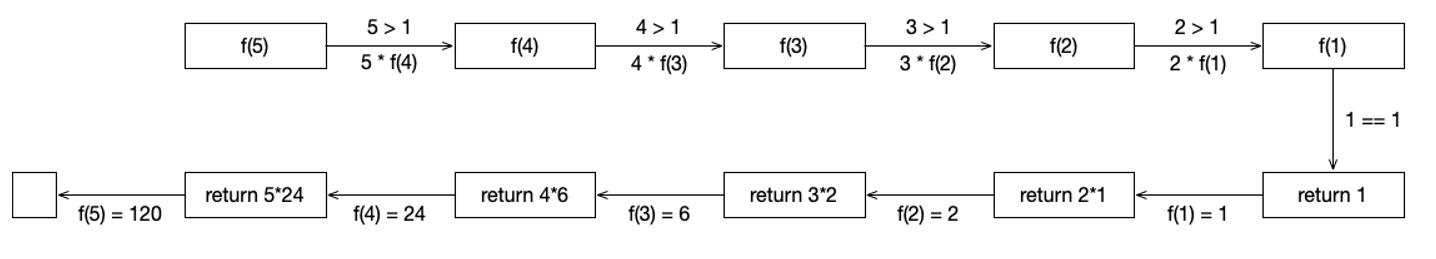<img src="assets/recursion-factorial.png" width="800">

如上图所示，当 f(5) 被调用之后，函数开始运行……
* 因为 `5 > 1`，所以，在计算 `n * f(n-1)` 的时候要再次调用自己 `f(4)`；所以必须等待 `f(4)` 的值返回；
* 因为 `4 > 1`，所以，在计算 `n * f(n-1)` 的时候要再次调用自己 `f(3)`；所以必须等待 `f(3)` 的值返回；
* 因为 `3 > 1`，所以，在计算 `n * f(n-1)` 的时候要再次调用自己 `f(2)`；所以必须等待 `f(2)` 的值返回；
* 因为 `2 > 1`，所以，在计算 `n * f(n-1)` 的时候要再次调用自己 `f(1)`；所以必须等待 `f(1)` 的值返回；
* 因为 `1 == 1`，所以，这时候不会再次调用 `f()` 了，`f(1)` 返回值是 `1`；
* 下一步，`f(2)` 返回值是 `2 * 1 = 2`；
* 下一步，`f(3)` 返回值是`3 * 2 = 6`；
* 下一步，`f(4)` 返回值是`4 * 6 = 24`；
* 下一步，`f(5)` 返回值是`5 * 24 = 120`。

至此，函数调用 `f(5)` 才执行完，最终返回值是 `120`。这个调用中“**递归**（*recursively*）”调用了四次 `f()` 自己。

> *Recursive* 本来就是“反复、重复”的意思。

试着在自己脑子里把这个过程走通，有点烧脑，不过搞清楚了也很有意思。

## 递归的终止

从上面的例子，我们可以发现，最终 f(1) 不再需要递归，可以直接返回一个确定的值，这一步是递归的转折点，特别重要，如果没有这个，递归就会无穷无尽的重复下去，永远得不到结果，就像最开始我们写的那个老和尚讲故事的例子一样。

把我们计算阶乘的例子中的 `if n == 1:` 条件去掉，直接写成这样：

```python
def f(n):
    return n * f(n-1)
```

如果运行这个版本的 `f(5)`，会得到一个运行时异常 `RecursionError: maximum recursion depth exceeded`，因为 Python 对递归次数是有限制的，达到一定次数还没返回的递归会抛出这个异常。

我们写递归函数的时候，要特别小心的确认递归的终止条件，就和循环中的退出条件一样，一定不能出现无限递归或者死循环的情况。

## 递归的好处与代价

从理论上可以证明，所有递归（*recursion*）都可以改写为循环（*iteration*），反之所有循环也都可以用递归改写。那么我们写递归这样的算法好处是什么呢？

> Alonzo Church 和 Alan Turing 两位现代计算机科学的奠基者的[经典论文](https://en.wikipedia.org/wiki/Church%E2%80%93Turing_thesis)提供了证明，前提是内存管够。

最大的好处是清晰易懂。递归通常用于本质上就带有递归特性的问题（如前面所见的例子），递归算法几乎原样展现了问题的本质，容易理解也容易编写。

另外的好处是，对某些问题的算法，递归是最优化的，比如树型结构的遍历。

凡事有得必有失。递归的代价是什么呢？

主要代价有二：递归一般会使用更多的内存，因为每次调用自身都需要建立新函数调用所需要的环境，占用相应的资源，一直迭代到最深层开始返回才会释放这些资源，对此有些编程语言会在编译器和运行时进行优化，比如“**尾递归优化**（*tail-recursion optimization, TRO*）”，能够将这种消耗免除，但 Python 并不支持（以后也不会支持），所以 Python 会限制递归的层次，超过就扔出 `RecursiveError`。

另一个代价是，有的时候递归算法不是最高效的，这涉及到算法分析，我们目前还不用深入，知道有这些代价就好。

对于我们来说，了解这种思考问题的方法，在碰到适合的问题时能多一个思路，就是相当不错的收获了。

## 小试身手

1. 使用递归求最大公约数  
（1）编写函数gcd(m,n)，可以如下递归定义:  
* 如果m%n为0，那么gcd(m,n)的值为n。
* 否则，gcd(m,n)的值是gcd(n,m%n)
（2）调用gcd函数，测试gcd的正确性


In [4]:
def gcd(m,n):
    if m%n == 0:
        return n
    else:
        return gcd(n,m%n)
print(gcd(15,25))

5


2.使用递归方法逆序输出一个整数中的数字  
（1）编写函数reverseDisplay(value)，可以如下递归定义：  
* 如果value大于0，那么输出个位数，并继续递归调用reverseDisplay(value//10)
* 否则 函数结束  

（2）调用reverseDisplay函数，测试reverseDisplay的正确性。  

reverseDisplay(12345)  
54321  

In [12]:
def reverseDisplay(value):
    pass
reverseDisplay(12345)

54321

3.使用递归方法逆序输出一个字符串中的字母  
（1）编写函数reverseDisplay(s)，可以如下递归定义：  

* 如果s的长度不等于1，那么s串去首字符，继续递归调用。  
* 输出字符串的首字符。

（2）调用reverseDisplay函数，测试reverseDisplay的正确性。  

reverseDisplay("abcde")  
edcba  

In [11]:
def reverseDisplay(s):
    if len(s)!=1:
        reverseDisplay(s[1:])
    print(s[0],end="")
reverseDisplay("abcde")

edcba